In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Part 1

In [2]:
"""
Data from:
title={The Network Data Repository with Interactive Graph Analytics and Visualization},
author={Ryan A. Rossi and Nesreen K. Ahmed},
booktitle={AAAI},
url={https://networkrepository.com},
year={2015}
"""

file = 'data/bn-fly-drosophila_medulla_1.edges'
G = nx.read_edgelist(file)

In [3]:
G.size()

9016

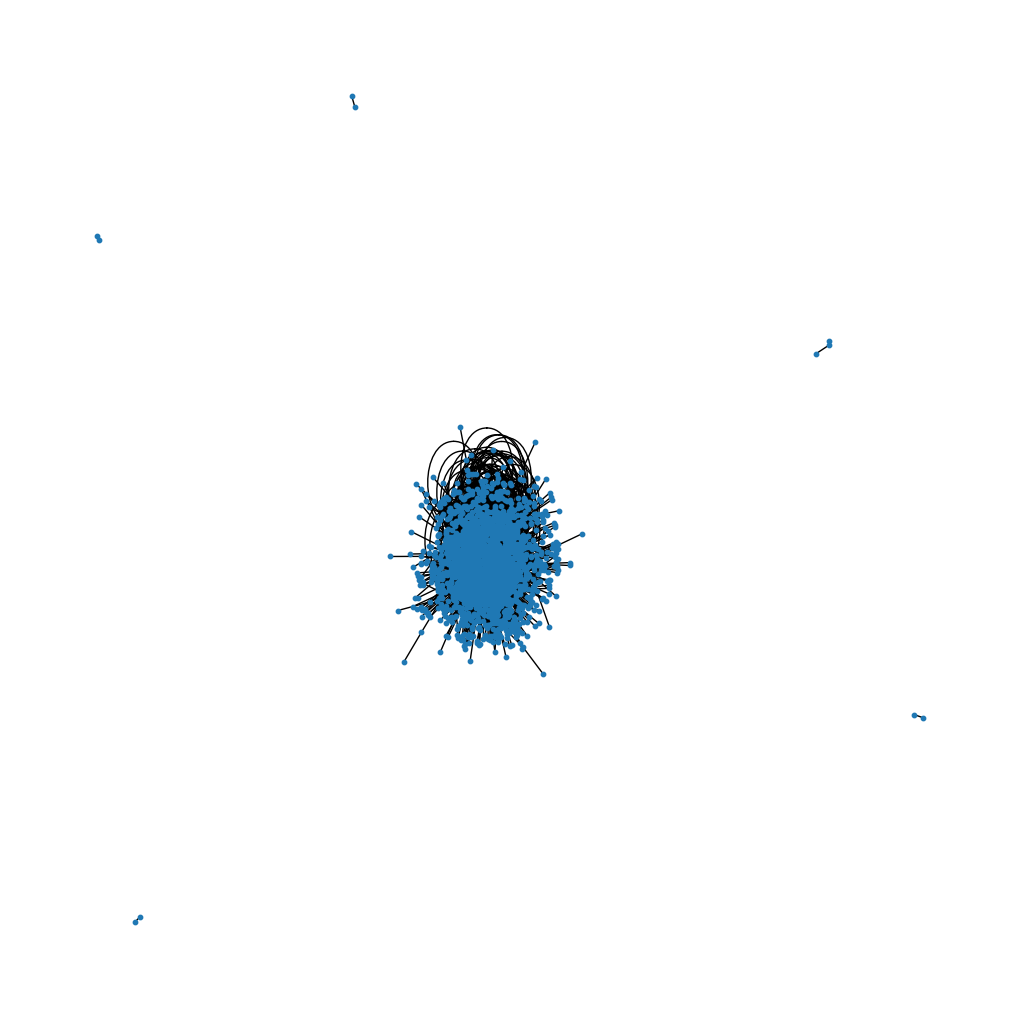

In [4]:
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, with_labels=False)
plt.show()

# Part 2

In [51]:
def calculate_avg_degree_and_distribution(G):
    degrees = [G.degree(n) for n in G.nodes()]
    degrees_distribution = {i: degrees.count(i) / G.number_of_nodes() for i in range(max(degrees) + 1)}
    avg_degree = sum(degrees) / G.number_of_nodes()
    return avg_degree, degrees_distribution

In [23]:
class Node:
    def __init__(self, id):
        self.id = id
        self.neighbors = set()

    def add_neighbor(self, neighbor):
        self.neighbors.add(neighbor)

    def clustering(self, A):
        n = len(self.neighbors)
        if n < 2:
            return 0
        possible = n * (n - 1)
        return sum(A[n1][n2] for n1 in self.neighbors for n2 in self.neighbors) / possible

In [24]:
def calculate_avg_clustering_coeff_and_distribution(G):
    A = nx.to_numpy_array(G)

    nodes = [Node(i) for i in range(len(G.nodes()))]
    for i in range(len(A)):
        for j in range(len(A)):
            if A[i][j] == 1:
                nodes[i].add_neighbor(j)

    clustering_coefficients = [node.clustering(A) for node in nodes]
    C_distribution = {i: clustering_coefficients.count(i) / len(clustering_coefficients) for i in np.unique(clustering_coefficients)}
    avg_clustering_coeff = sum(clustering_coefficients) / len(clustering_coefficients)

    return avg_clustering_coeff, C_distribution

In [25]:
def bfs_shortest_path(matrix, start):
    n = len(matrix)
    distances = [float('inf')] * n
    distances[start] = 0
    queue = deque([start])

    while queue:
        current = queue.popleft()
        for neighbor in range(n):
            if matrix[current][neighbor] == 1 and distances[neighbor] == float('inf'):
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

def shortest_path_distribution(G):
    A = nx.to_numpy_array(G)
    n = len(A)
    dist = []
    for i in range(n):
        dist.extend(bfs_shortest_path(A, i))
    dist_distribution = {i: dist.count(i) / len(dist) for i in set(dist)}
    return dist_distribution

In [26]:
def calculate_shortest_path_distribution_diameter_mean(G):
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
    shortest_path_lenghts_deleted = []

    # deleting path to itself
    for source in shortest_path_lengths:
        for target in shortest_path_lengths[source]:
            if source != target:
                shortest_path_lenghts_deleted.append(shortest_path_lengths[source][target])

    diameter = max(shortest_path_lenghts_deleted)
    mean = sum(shortest_path_lenghts_deleted) / len(shortest_path_lenghts_deleted)
    shortest_path_distribution_dict = {i: shortest_path_lenghts_deleted.count(i) / len(shortest_path_lenghts_deleted) for i in set(shortest_path_lenghts_deleted)}

    return shortest_path_distribution_dict, diameter, mean

In [27]:
def plot_sp_distribution(distribution):
    plt.figure(figsize=(10, 5))
    plt.bar(distribution.keys(), distribution.values())
    plt.title("Shortest path distribution")
    plt.xlabel("l")
    plt.ylabel("P(l)")
    xticks = range(0, max(distribution.keys()) + 1)
    plt.show()

def plot_cc_distribution(distribution):
    plt.figure(figsize=(10, 5))
    plt.plot(distribution.keys(), distribution.values())
    plt.title("Clustering coefficient distribution")
    plt.xlabel("C")
    plt.ylabel("P(C) (log)")
    plt.yscale('log')
    plt.show()

def plot_degree_distribution(distribution):
    plt.figure(figsize=(10, 5))
    plt.bar(distribution.keys(), distribution.values())
    plt.title("Degree distribution")
    plt.xlabel("Degree")
    plt.ylabel("P(k)")
    plt.show()

In [28]:
file = 'data/facebook_combined.edges'
G = nx.read_edgelist(file)

In [29]:
G.size()

88234

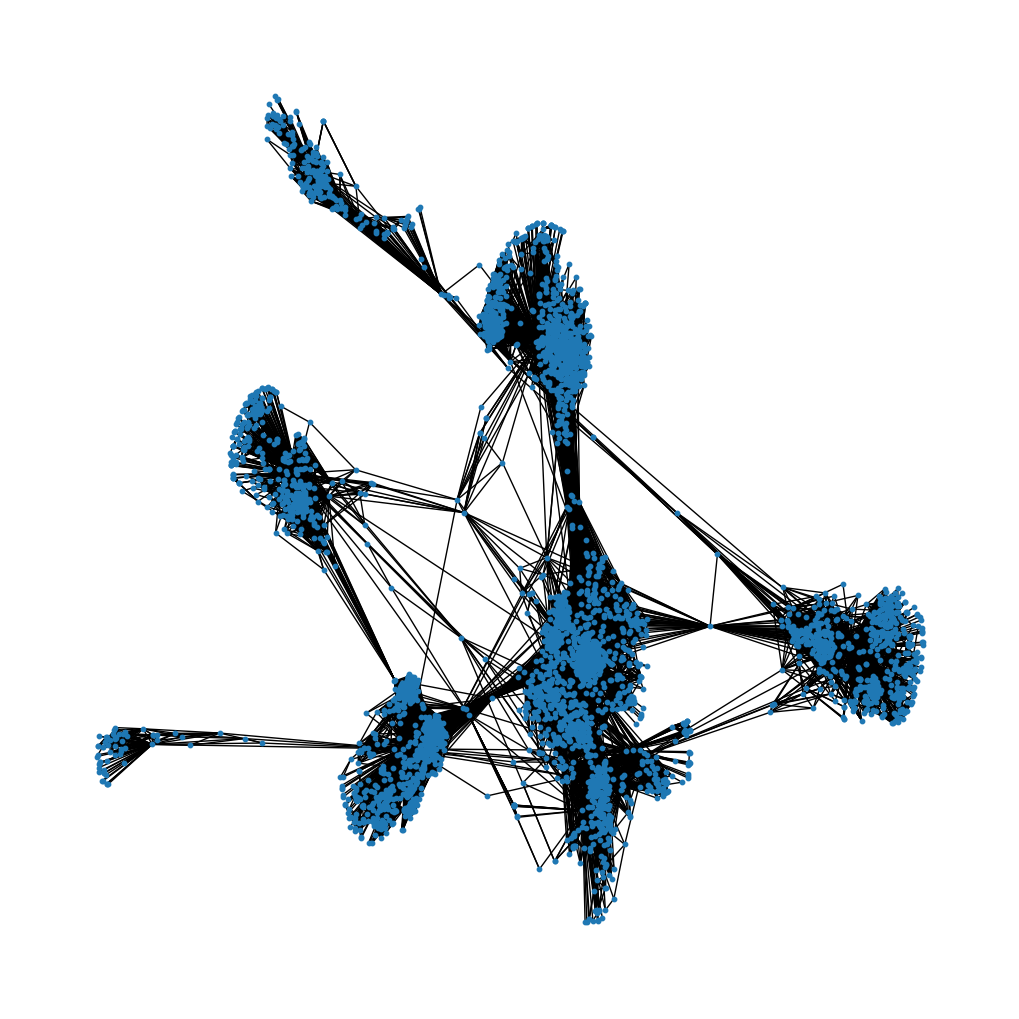

In [30]:
plt.figure(figsize=(10, 10))
nx.draw(G, node_size=10, with_labels=False)
plt.show()

In [55]:
avg_d, d_distr = calculate_avg_degree_and_distribution(G)

In [56]:
avg_c, c_distr = calculate_avg_clustering_coeff_and_distribution(G)

In [57]:
l_distr, diameter, l_avg = calculate_shortest_path_distribution_diameter_mean(G)

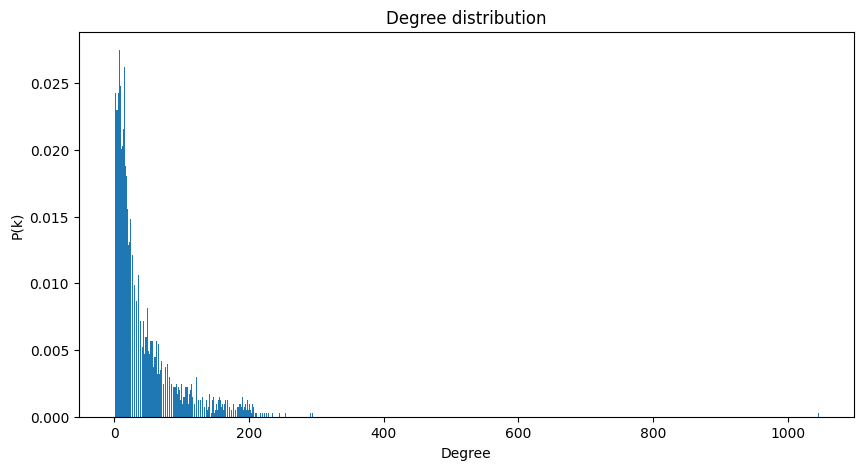

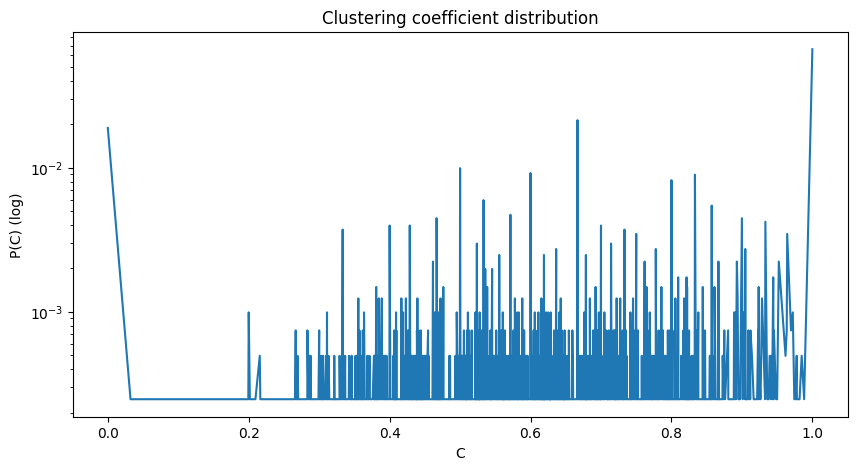

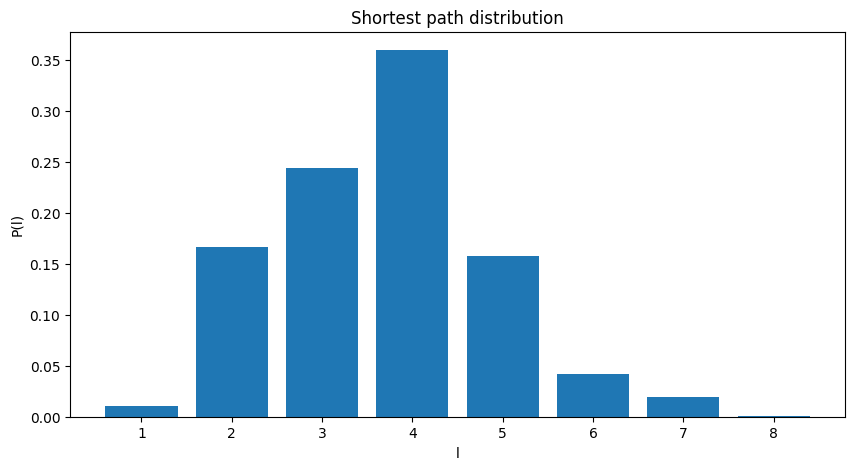

Average degree:  43.69101262688784
Average clustering coefficient:  0.6055467186200876
Diameter:  8
Average shortest path length:  3.6925068496963913


In [58]:
plot_degree_distribution(d_distr)
plot_cc_distribution(c_distr)
plot_sp_distribution(l_distr)
print("Average degree: ", avg_d)
print("Average clustering coefficient: ", avg_c)
print("Diameter: ", diameter)
print("Average shortest path length: ", l_avg)

# Part 3

In [35]:
def erdos_renyil_graph(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    edges = []
    while len(edges) < L:
        edge = np.random.randint(0, N, 2)
        if (
            edge[0] != edge[1] and 
            not any([
                (edge[0] == e[0] and edge[1] == e[1]) or 
                (edge[0] == e[1] and edge[1] == e[0]) 
                for e in edges
                ])
            ):
            edges.append(edge)
            
    for edge in edges:
        G.add_edge(*edge)

    return G

In [36]:
def erdos_renyil_gilbert_model(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i + 1, N):
            if np.random.rand() < p:
                G.add_edge(i, j)
                
    return G

In [40]:
def generate_ring_model(N, k):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(N):
            if 0 < abs(i - j) % (N - 1 - k/2) <= k/2:
                G.add_edge(i, j)
    
    return G

def watts_strongatz_model(N, k, B):
    G = generate_ring_model(N, k)
    checked = []
    for i in range(N):
        for j in range(N):
            if 0 < abs(i - j) % (N - 1 - k/2) <= k/2:
                if (i, j) not in checked and (j, i) not in checked:
                    checked.append((i, j))
                    if np.random.rand() < B:
                        new_edge = np.random.choice(list(G.nodes()))
                        while new_edge == i or G.has_edge(i, new_edge):
                            new_edge = np.random.choice(list(G.nodes()))
                        G.remove_edge(i, j)
                        G.add_edge(i, new_edge)
    return G

In [ ]:
models = [
    erdos_renyil_graph(1000, 2000),
    erdos_renyil_gilbert_model(1000, 0.004),
    watts_strongatz_model(1000, 4, 0.25),
]

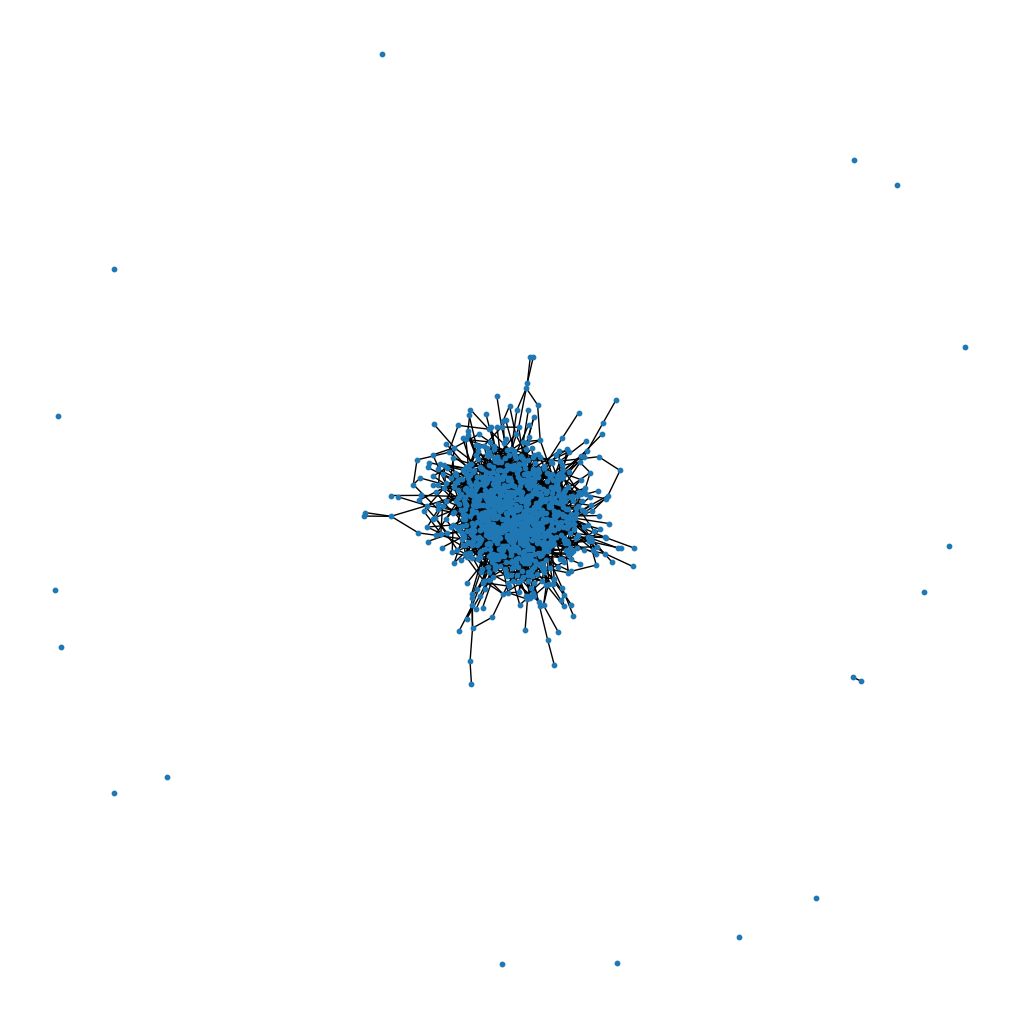

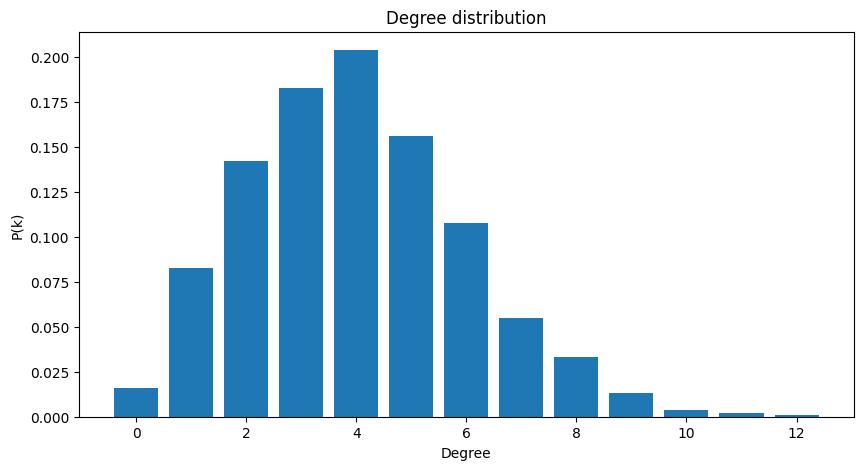

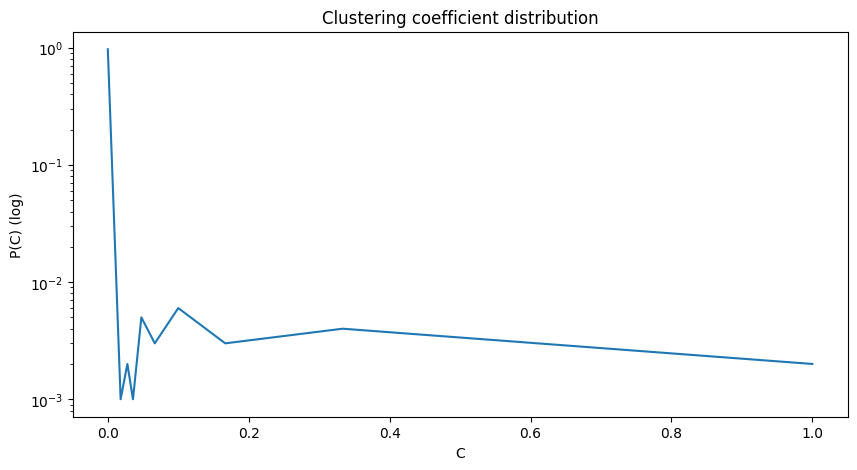

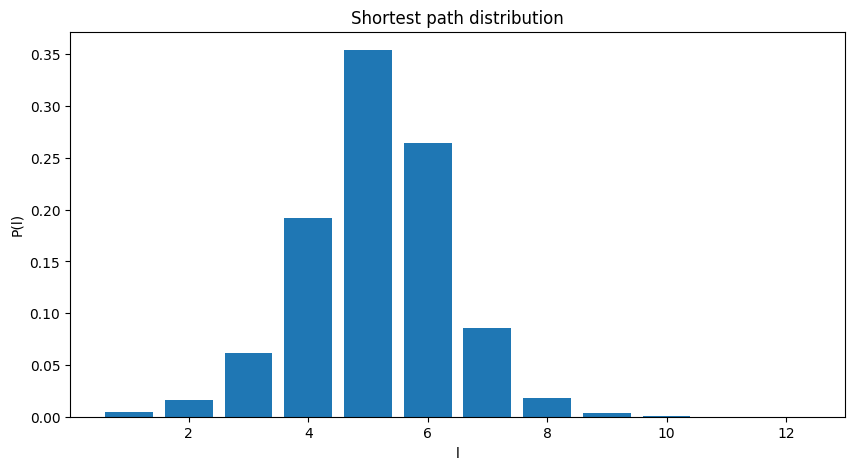

Edges:  2000
Average degree:  4.0
Average clustering coefficient:  0.0049808802308802325
Diameter:  12
Average shortest path length:  5.12243186234616


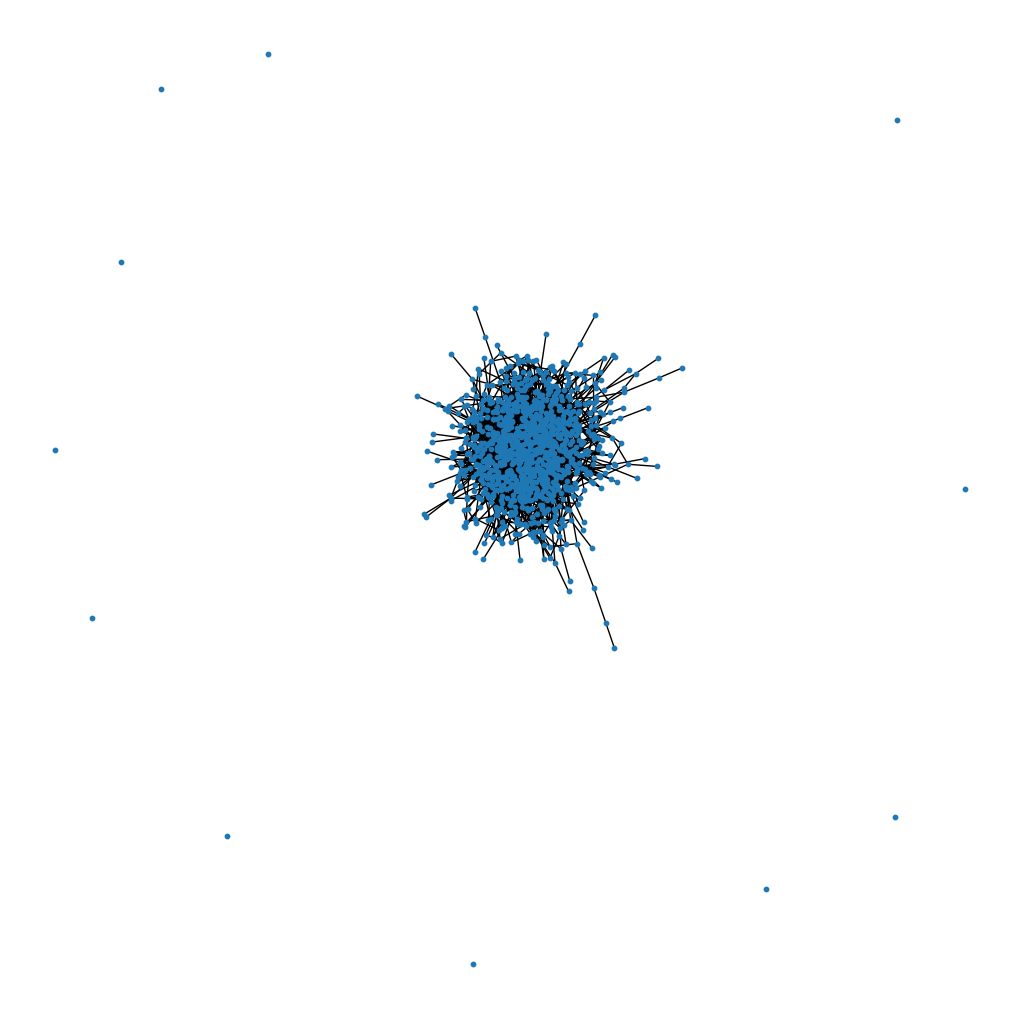

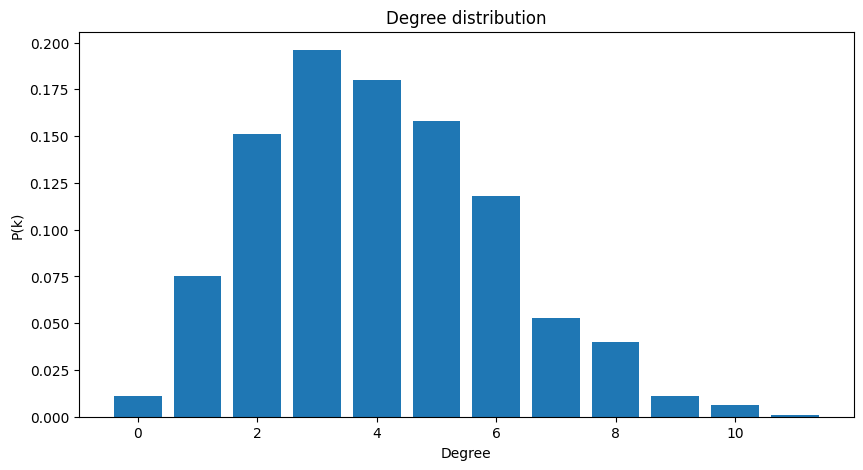

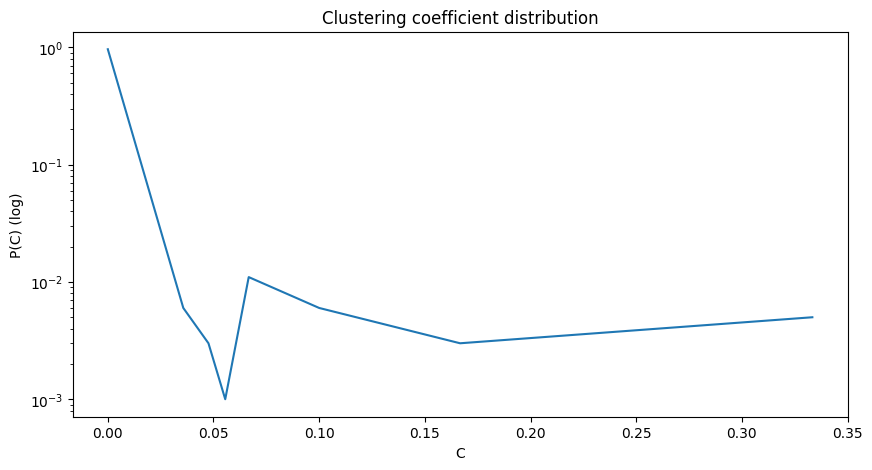

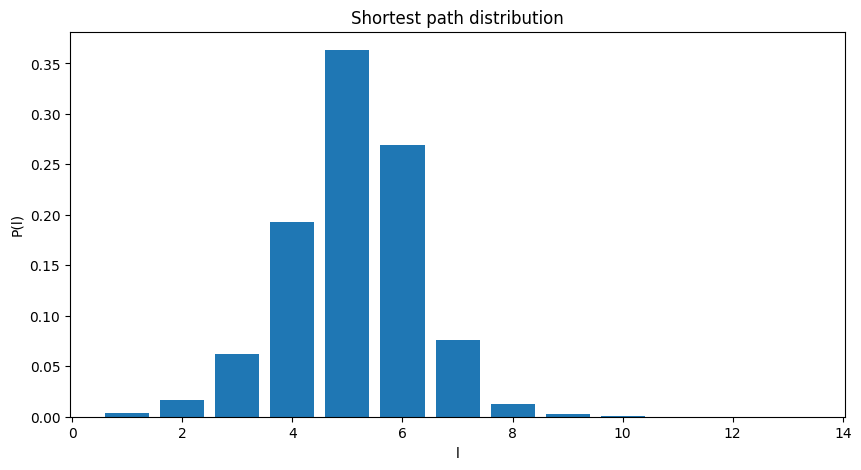

Edges:  2022
Average degree:  4.044
Average clustering coefficient:  0.003912698412698414
Diameter:  13
Average shortest path length:  5.08930830225599


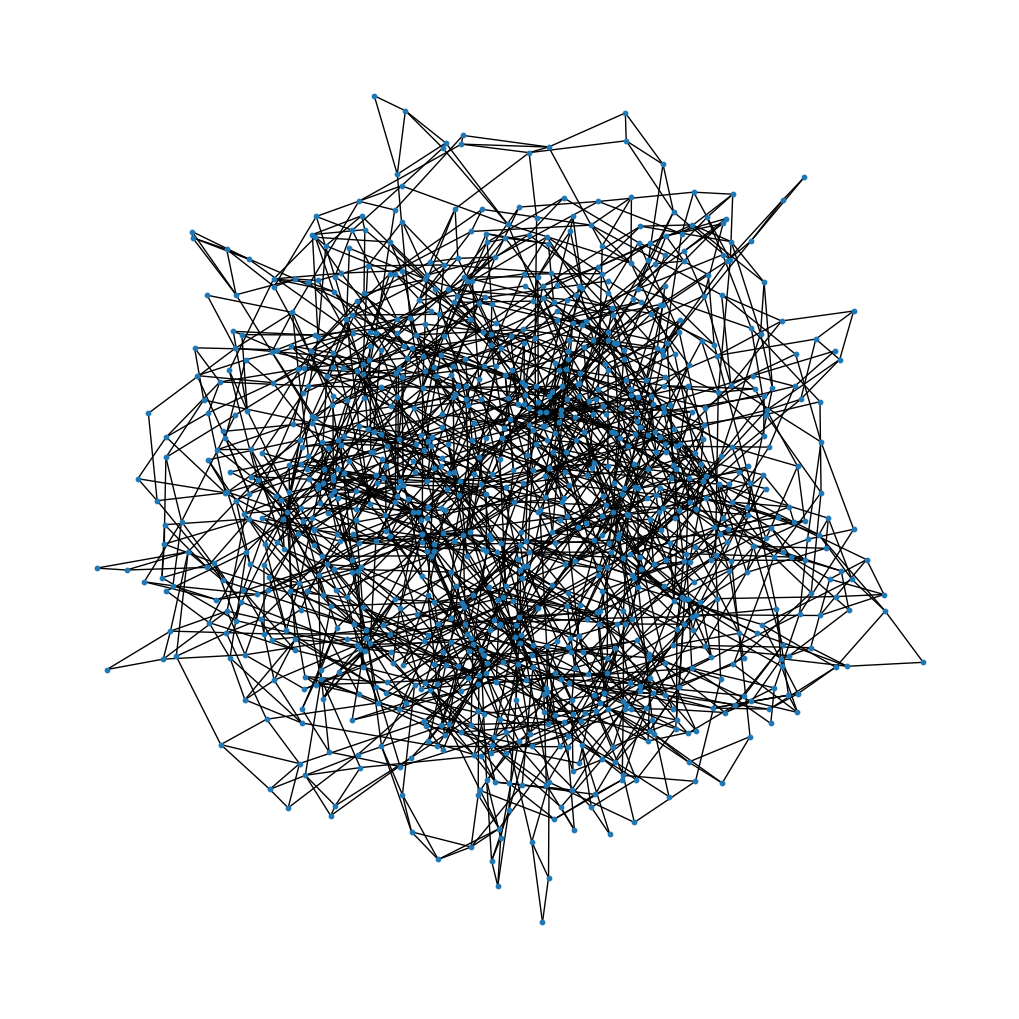

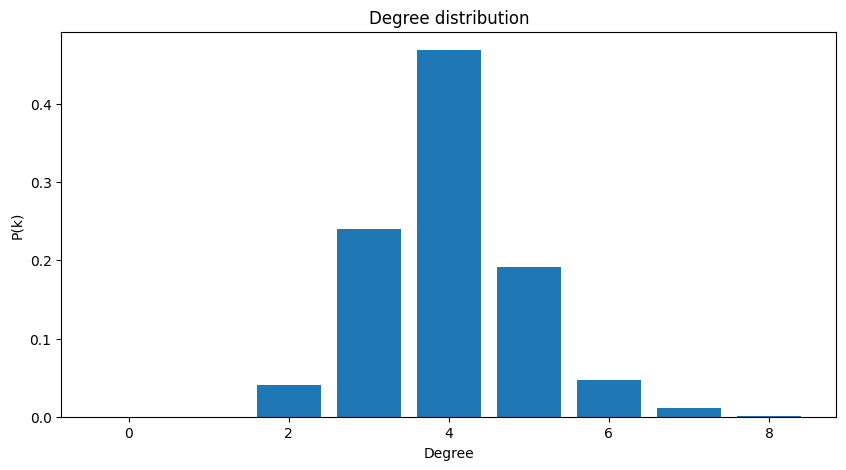

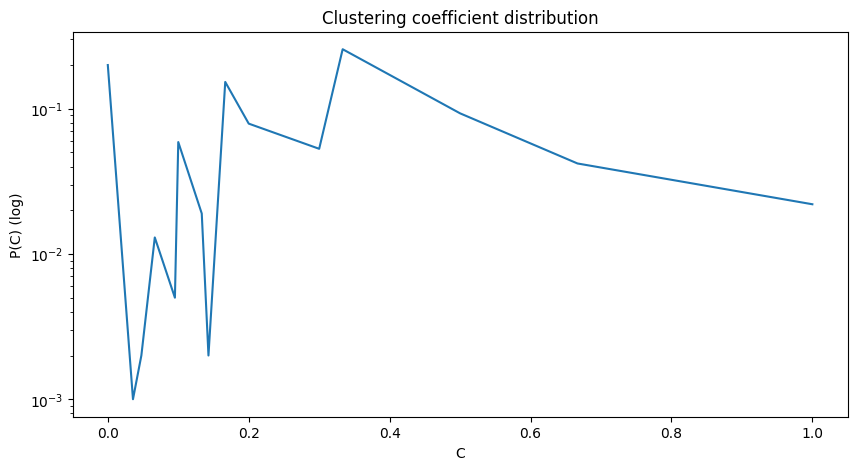

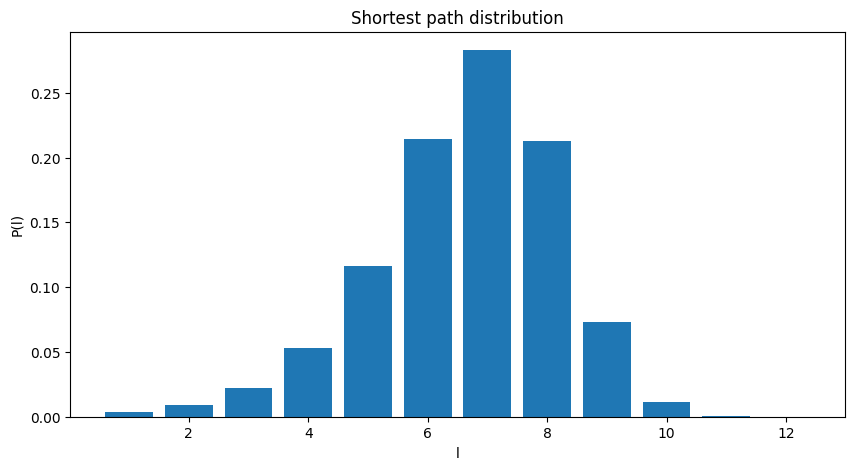

Edges:  2000
Average degree:  4.0
Average clustering coefficient:  0.2495595238095238
Diameter:  12
Average shortest path length:  6.631173173173173


In [54]:
for model in models:
  plt.figure(figsize=(10, 10))
  nx.draw(model, node_size=10, with_labels=False)
  plt.show()
  avg_d, d_distr = calculate_avg_degree_and_distribution(model)
  avg_c, c_distr = calculate_avg_clustering_coeff_and_distribution(model)
  l_distr, diameter, l_avg = calculate_shortest_path_distribution_diameter_mean(model)
  plot_degree_distribution(d_distr)
  plot_cc_distribution(c_distr)
  plot_sp_distribution(l_distr)
  print("Edges: ", model.number_of_edges())
  print("Average degree: ", avg_d)
  print("Average clustering coefficient: ", avg_c)
  print("Diameter: ", diameter)
  print("Average shortest path length: ", l_avg)